<a href="https://colab.research.google.com/github/SmitM1/Handwritten-Digits-Classification-using-Neural-Network/blob/main/Handwritten_Digits_Classification_using_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [23]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [24]:
len(X_train)

60000

In [25]:
len(X_test)

10000

In [26]:
X_train[0].shape

(28, 28)

In [27]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

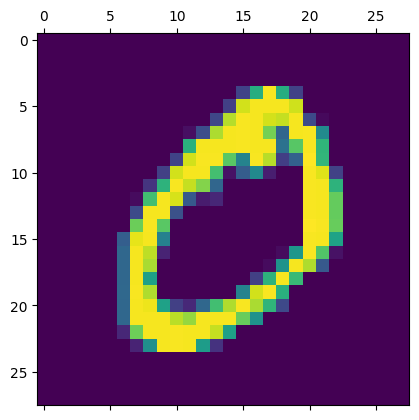

In [28]:
plt.matshow(X_train[1])

In [29]:
y_train[2]

4

In [30]:
X_train.shape

(60000, 28, 28)

In [31]:
X_train = X_train / 255
X_test = X_test / 255

In [32]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)


In [33]:
X_train_flattened.shape

(60000, 784)

In [34]:
X_test_flattened.shape

(10000, 784)

In [35]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4697 - accuracy: 0.8765
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3042 - accuracy: 0.9149
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2835 - accuracy: 0.9203
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2729 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2669 - accuracy: 0.9255


In [36]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2687 - accuracy: 0.9260


[0.26865601539611816, 0.9259999990463257]

In [37]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 2ms/step


array([3.0726604e-02, 3.4369478e-07, 5.5305555e-02, 9.6237046e-01,
       2.0192764e-03, 1.2931323e-01, 2.0972498e-06, 9.9982613e-01,
       9.0992235e-02, 7.3022306e-01], dtype=float32)

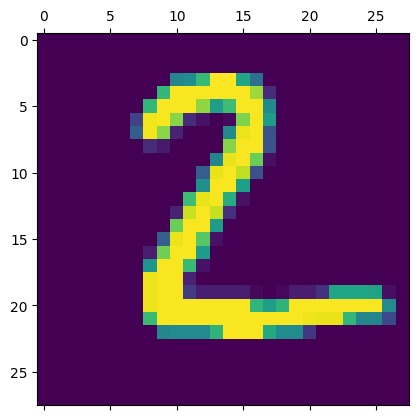

In [44]:
plt.matshow(X_test[1])

In [45]:
np.argmax(y_predicted[1])

2

In [46]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [48]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 967,    0,    1,    2,    0,    5,    2,    2,    1,    0],
       [   0, 1116,    3,    2,    0,    1,    4,    2,    7,    0],
       [   8,    9,  916,   18,    9,    4,   11,   10,   44,    3],
       [   4,    0,   15,  927,    0,   23,    2,   11,   21,    7],
       [   2,    1,    4,    2,  920,    0,    9,    4,   10,   30],
       [  11,    3,    4,   32,   11,  781,   10,    5,   29,    6],
       [  14,    3,    7,    1,    7,   17,  905,    2,    2,    0],
       [   2,    7,   22,    6,    7,    0,    0,  955,    1,   28],
       [   9,    9,    6,   24,    9,   27,    8,   12,  865,    5],
       [  11,    7,    1,   12,   30,    7,    0,   25,    8,  908]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

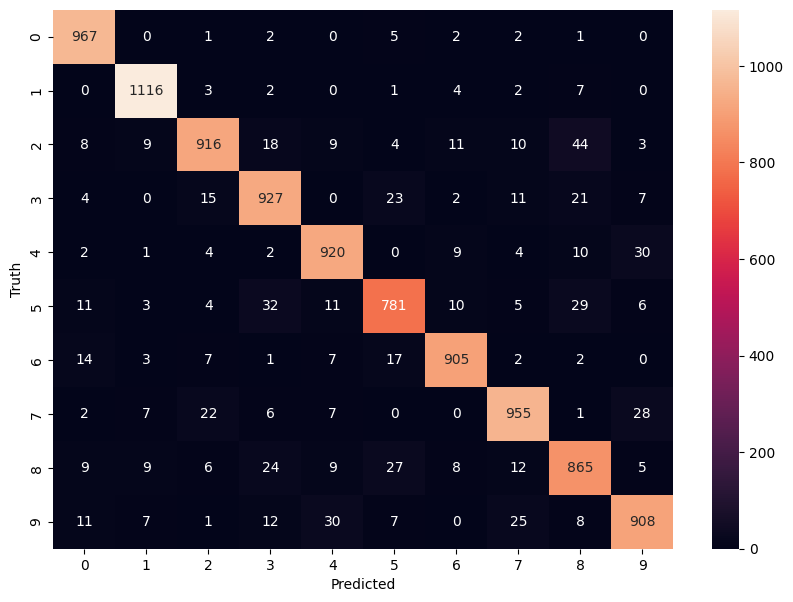

In [49]:
import seaborn as sn
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [50]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2704 - accuracy: 0.9240
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1198 - accuracy: 0.9650
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0838 - accuracy: 0.9754
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0632 - accuracy: 0.9811
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0506 - accuracy: 0.9851


In [51]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0943 - accuracy: 0.9703


[0.09432327747344971, 0.970300018787384]